# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Final term project</b></u>

### Roster Name: David Danialy
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu

##  <u> Project description/introduction text (the background information) </u>

Predicting whether someone will receive a loan using multiple machine learning methods.

##  <u> Machine learning algorithm selected for this project </u>

SVM, KNN, Logistic Regression, Naive Bayesian, Decision Tree, and ANN classifiers. 

##  <u> Dataset source </u>

https://www.kaggle.com/ninzaami/loan-predication

##  <u> References and sources </u>

https://www.geeksforgeeks.org/python-get-unique-values-list/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [390]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

In [391]:
#https://www.geeksforgeeks.org/python-get-unique-values-list/
def convertStringToBinary(data):
    unique_list = []
    for x in data:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    #If there aren't two unique values, return null
    if len(unique_list) != 2:
        return None
    #Replace the strings with binary
    for i in range(len(data)):
        if data[i] == unique_list[0]:
            data[i] = 1
        else:
            data[i] = 0
    return data

### Data Preprocessing

In [392]:
#Load the data from the CSV
dataset = pd.read_csv('loan.csv')

#Separate the labels from the features
labels = dataset['Loan_Status']
dataset = dataset.drop(['Loan_ID', 'Loan_Status'], axis=1)

#One hot encode the categorical variables
dataset = pd.get_dummies(dataset, columns=['Gender', 'Married', 'Property_Area', 'Dependents', 'Self_Employed'])

#Replace NaN with 0
dataset['LoanAmount'] = np.nan_to_num(dataset['LoanAmount'].to_numpy())
dataset['Credit_History'] = np.nan_to_num(dataset['Credit_History'].to_numpy())
dataset['CoapplicantIncome'] = np.nan_to_num(dataset['CoapplicantIncome'].to_numpy())
dataset['ApplicantIncome'] = np.nan_to_num(dataset['ApplicantIncome'].to_numpy())
dataset['LoanAmount'] = np.nan_to_num(dataset['LoanAmount'].to_numpy())
dataset['Loan_Amount_Term'] = np.nan_to_num(dataset['Loan_Amount_Term'].to_numpy())

#Convert Education column into binary. 1 is graduate, 0 is not graduate.
dataset['Education'] = convertStringToBinary(dataset['Education'].to_numpy())

#Convert labels into binary. 1 is Y, 0 is N
#labels = convertStringToBinary(labels)

#Rescale the data
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(dataset)

#Split the data into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, labels, test_size=0.2, random_state=0, stratify=labels)

### SVM Classifier

Accuracy of linear SVC on training set: 0.72
Accuracy of linear SVC on test set: 0.71
Area under ROC Curve for Training Set: 0.6980037766387914
Area under ROC Curve for Test Set: 0.6718266253869969


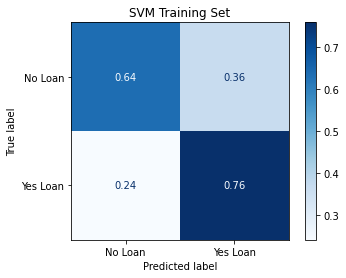

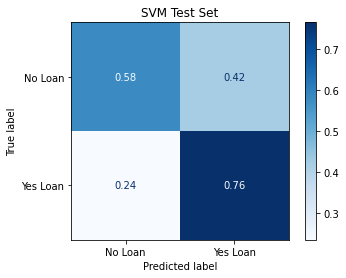

In [393]:
#Define and train the model
SVM_Model = LinearSVC(multi_class='ovr', class_weight={'N': .73, 'Y': .27}, C=1.0, max_iter=4000)
SVM_Model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(SVM_Model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(SVM_Model.score(X_test, Y_test)))

#Make predictions on the train data
pred = convertStringToBinary(SVM_Model.predict(X_train)).tolist()
for i in range(len(pred)):
    if pred[i] == 0:
        pred[i] = 1
    else: pred[i] = 0

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Training Set: " + str(metrics.auc(fpr, tpr)))

#Make predictions on the test data
pred = convertStringToBinary(SVM_Model.predict(X_test)).tolist()

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Test Set: " + str(metrics.auc(fpr, tpr)))

# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

#Create a confusion matrix
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(SVM_Model, X_train, Y_train,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('SVM Training Set')

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(SVM_Model, X_test, Y_test,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('SVM Test Set')

plt.show()

### K-NN Classifier

Accuracy of K-NN on training set: 0.80
Accuracy of K-NN on test set: 0.72
Area under ROC Curve for Training Set: 0.771176153223631
Area under ROC Curve for Test Set: 0.6777089783281733


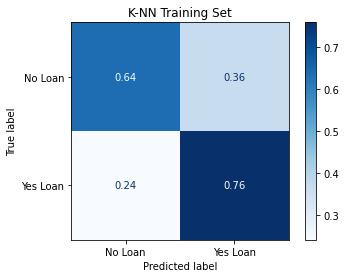

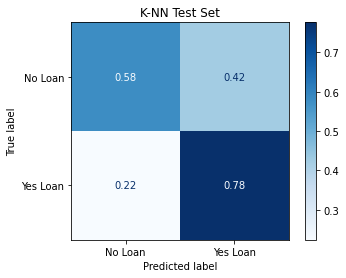

In [394]:
#Define and train the model
KNN_Model = KNeighborsClassifier(n_neighbors=4)
KNN_Model.fit(X_train, Y_train)

#Score the accuracies of the model
print('Accuracy of K-NN on training set: {:.2f}'.format(KNN_Model.score(X_train, Y_train)))
print('Accuracy of K-NN on test set: {:.2f}'.format(KNN_Model.score(X_test, Y_test)))

#Make predictions on the training data
pred = convertStringToBinary(KNN_Model.predict(X_train)).tolist()
for i in range(len(pred)):
    if pred[i] == 0:
        pred[i] = 1
    else: pred[i] = 0

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Training Set: " + str(metrics.auc(fpr, tpr)))

#Make predictions on the test data
pred = convertStringToBinary(KNN_Model.predict(X_test)).tolist()

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Test Set: " + str(metrics.auc(fpr, tpr)))

# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

#Create a confusion matrix

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(SVM_Model, X_train, Y_train,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('K-NN Training Set')

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(KNN_Model, X_test, Y_test,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('K-NN Test Set')

plt.show()

### Logistic Regression Classifier

Accuracy of Logistic Regression on training set: 0.71
Accuracy of Logistic Regression on test set: 0.70
Area under ROC Curve for Training Set: 0.6911441674052949
Area under ROC Curve for Test Set: 0.6877708978328174


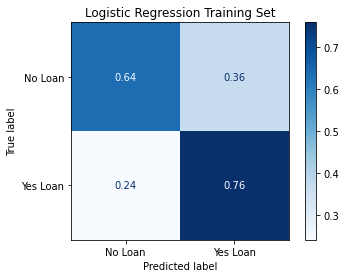

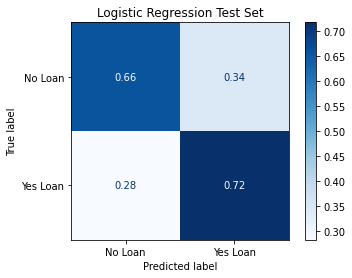

In [395]:
#Define and train the model
Logistic_Model = LogisticRegression(random_state=0, class_weight={'N': .73, 'Y': .27})
Logistic_Model.fit(X_train, Y_train)

#Score the accuracies of the model
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(Logistic_Model.score(X_train, Y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(Logistic_Model.score(X_test, Y_test)))

#Make predictions on the training data
pred = convertStringToBinary(Logistic_Model.predict(X_train)).tolist()
for i in range(len(pred)):
    if pred[i] == 0:
        pred[i] = 1
    else: pred[i] = 0

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Training Set: " + str(metrics.auc(fpr, tpr)))

#Make predictions on the test data
pred = convertStringToBinary(Logistic_Model.predict(X_test)).tolist()

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Test Set: " + str(metrics.auc(fpr, tpr)))

# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

#Create a confusion matrix

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(SVM_Model, X_train, Y_train,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Logistic Regression Training Set')

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(Logistic_Model, X_test, Y_test,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Logistic Regression Test Set')

plt.show()

### Naive Bayesian Classifier

Accuracy of Naive Bayesian Classifier on training set: 0.76
Accuracy of Naive Bayesian Classifier on test set: 0.70
Area under ROC Curve of Training Set: 0.6965008285483063
Area under ROC Curve of Test Set: 0.6222910216718266


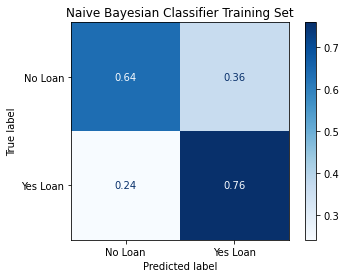

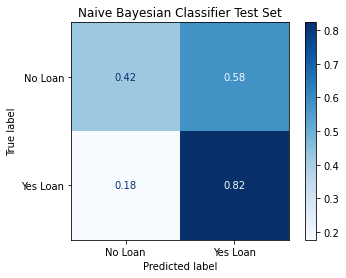

In [396]:
#Define and train the model
Bayes_Model = GaussianNB()
Bayes_Model.fit(X_train, Y_train)

#Score the accuracies of the model
print('Accuracy of Naive Bayesian Classifier on training set: {:.2f}'.format(Bayes_Model.score(X_train, Y_train)))
print('Accuracy of Naive Bayesian Classifier on test set: {:.2f}'.format(Bayes_Model.score(X_test, Y_test)))

#Make predictions on the training data
pred = convertStringToBinary(Bayes_Model.predict(X_train)).tolist()
for i in range(len(pred)):
    pred[i] = int(pred[i])
    if pred[i] == 0:
        pred[i] = 1
    else: pred[i] = 0

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve of Training Set: " + str(metrics.auc(fpr, tpr)))

#Make predictions on the test data
pred = convertStringToBinary(Bayes_Model.predict(X_test)).tolist()
for i in range(len(pred)):
    pred[i] = int(pred[i])

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve of Test Set: " + str(metrics.auc(fpr, tpr)))

# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

#Create a confusion matrix

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(SVM_Model, X_train, Y_train,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Naive Bayesian Classifier Training Set')

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(Bayes_Model, X_test, Y_test,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Naive Bayesian Classifier Test Set')

plt.show()


### Decision Tree Classifier

Accuracy of Decision Tree Classifier on training set: 0.78
Accuracy of Decision Tree Classifier on test set: 0.76
Area under ROC Curve for Training Set: 0.7748082777756369
Area under ROC Curve for Test Set: 0.7507739938080495


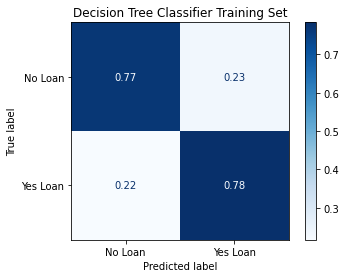

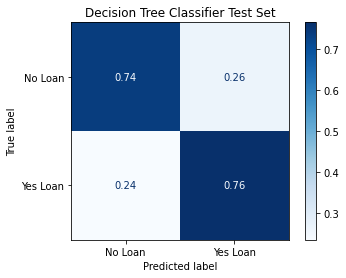

In [397]:
#Define and train the model
Tree_Model = DecisionTreeClassifier(random_state=0, max_depth=5, class_weight={'N': .67, 'Y': .33})
Tree_Model.fit(X_train, Y_train)

#Score the accuracies of the model
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(Tree_Model.score(X_train, Y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(Tree_Model.score(X_test, Y_test)))

#Make predictions on the training data
pred = convertStringToBinary(Tree_Model.predict(X_train)).tolist()
for i in range(len(pred)):
    pred[i] = int(pred[i])
    if pred[i] == 0:
        pred[i] = 1
    else: pred[i] = 0

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Training Set: " + str(metrics.auc(fpr, tpr)))
#Make predictions on the test data
pred = convertStringToBinary(Tree_Model.predict(X_test)).tolist()
for i in range(len(pred)):
    pred[i] = int(pred[i])

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Test Set: " + str(metrics.auc(fpr, tpr)))

# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(Tree_Model, X_train, Y_train,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Decision Tree Classifier Training Set')

#Create a confusion matrix
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(Tree_Model, X_test, Y_test,
                                display_labels=['No Loan', 'Yes Loan'],
                                cmap=plt.cm.Blues,
                                normalize='true')
disp.ax_.set_title('Decision Tree Classifier Test Set')

plt.show()

### Artificial Neural Network Classifier

In [ ]:
#Define and train the model
inputs_disc = x = tf.keras.Input(shape=(19,))
x = layers.Dense(24, activation="relu")(x)
x = layers.Dropout(0.25)(x)
outputs_disc = x = layers.Dense(1, activation="sigmoid")(x)

ANN_Model = tf.keras.Model(inputs=inputs_disc, outputs=outputs_disc, name="LoanPredictor")
ANN_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
ANN_Model.summary()

ANN_Model.fit(X_train.astype('float32'), convertStringToBinary(Y_train.to_numpy()).astype('float32'), epochs=75, class_weight={0: .65, 1: .35})

In [399]:
#Make predictions on the training data
pred = ANN_Model.predict(X_train)
for i in range(len(pred)):
    pred[i] = round(pred[i][0])

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_train.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Training Set: " + str(metrics.auc(fpr, tpr)))

#Create a confusion matrix
confusion = tf.math.confusion_matrix(
    convertStringToBinary(Y_train.to_list()), pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name='ANN Confusion Matrix').numpy()
print("Accuracy on training set: " + str((confusion[0][0] + confusion[1][1]) / (confusion[0][0] + confusion[0][1] + confusion[1][0] + confusion[1][1])))
print(confusion)

#Make predictions on the test data
pred = ANN_Model.predict(X_test)
for i in range(len(pred)):
    pred[i] = round(pred[i][0])

#Calculate area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(convertStringToBinary(Y_test.to_list()), pred, pos_label=1)
print("Area under ROC Curve for Test Set: " + str(metrics.auc(fpr, tpr)))

#Create a confusion matrix
confusion = tf.math.confusion_matrix(
    convertStringToBinary(Y_test.to_list()), pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name='ANN Confusion Matrix').numpy()
print("Accuracy on test set: " + str((confusion[0][0] + confusion[1][1]) / (confusion[0][0] + confusion[0][1] + confusion[1][0] + confusion[1][1])))
print(confusion)

#ANN_Model.save('.74 AUC.h5')

Area under ROC Curve for Training Set: 0.7472445951674438
Accuracy on training set: 0.7861507128309573
[[ 99  55]
 [ 50 287]]
Area under ROC Curve for Test Set: 0.7130030959752323
Accuracy on test set: 0.7642276422764228
[[22 16]
 [13 72]]
